In [1]:
import sys
sys.path.append("/root/mcrouch/projects/particle-swarm-optimisation")
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from pso.particle_swarm_optimisation import (
    ParticleSwarmOptimisation,
)

/root/mcrouch/projects/particle-swarm-optimisation/psopy/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function array> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


# Using the Particle Swarm Optimisation for Minimisation

As a starting point and to ensure that our code is working as expected, we will take the worked example derived in https://machinelearningmastery.com/a-gentle-introduction-to-particle-swarm-optimization/ 

The will give a baseline in which to compare our algorithm.

In [2]:
config = {
    "n_particles": 20,
    "lower_bound": 0,
    "upper_bound": 5,
    "std": 0.1,
    "inertia_weight": 0.8,
    "cognitive_coeff": 0.1,
    "social_coeff": 0.1,
    "n_dimensions": 2,
}

In [3]:
def dummy_func(pos: np.ndarray) -> np.ndarray:
    """Return fitness function.

    :param x: Input array
    :return: Output array
    """
    x = pos[:, 0]
    y = pos[:, 1]
    return (x - 3.14) ** 2 + (y - 2.72) ** 2 + np.sin(3 * x + 1.41) + np.sin(4 * y - 1.73)

In [4]:
def plotting_func(pso):
    # Set up base figure: The contour map
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.set_tight_layout(True)
    img = ax.imshow(z, extent=[0, 5, 0, 5], origin="lower", cmap="viridis", alpha=0.5)
    fig.colorbar(img, ax=ax)
    ax.plot([x_min], [y_min], marker="x", markersize=5, color="white")
    contours = ax.contour(x, y, z, 10, colors="black", alpha=0.4)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
    
    pbest_plot = ax.scatter(pso.swarm_func.particle_best[:, 0], pso.swarm_func.particle_best[:, 1], marker="o", color="black", alpha=0.5)
    p_plot = ax.scatter(pso.swarm_func.position[:, 0], pso.swarm_func.position[:, 1], marker="o", color="blue", alpha=0.5)
    p_arrow = ax.quiver(
        pso.swarm_func.position[:, 0], pso.swarm_func.position[:, 1], pso.swarm_func.velocity[:, 0], pso.swarm_func.velocity[:, 1], color="blue", width=0.005, angles="xy", scale_units="xy", scale=1
    )
    gbest_plot = plt.scatter([pso.swarm_func.global_best[0]], [pso.swarm_func.global_best[1]], marker="*", s=100, color="black", alpha=0.4)
    
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])

In [5]:
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z = (x - 3.14) ** 2 + (y - 2.72) ** 2 + np.sin(3 * x + 1.41) + np.sin(4 * y - 1.73)
# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

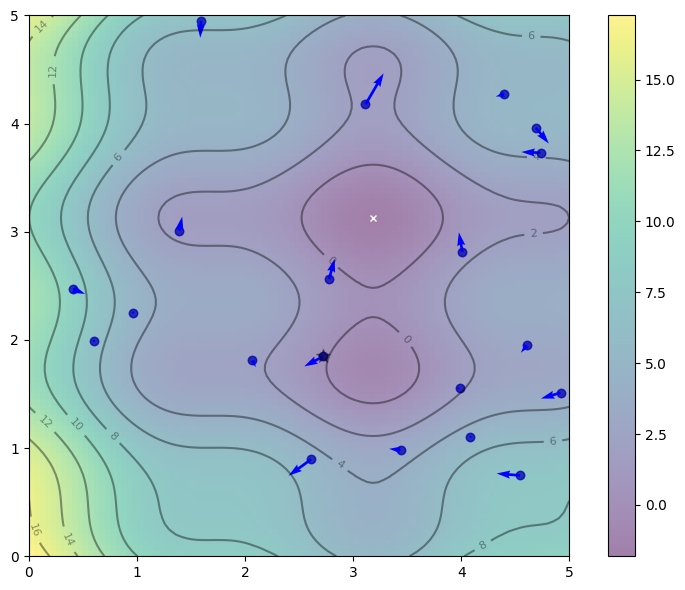

In [6]:
pso = ParticleSwarmOptimisation(swarm_configuration=config, custom_fitness_function=dummy_func)
plotting_func(pso)

In [7]:
pso.run(max_iterations=1)

(array([2.81994182, 2.71337839]), np.float64(-0.031291779881277015))

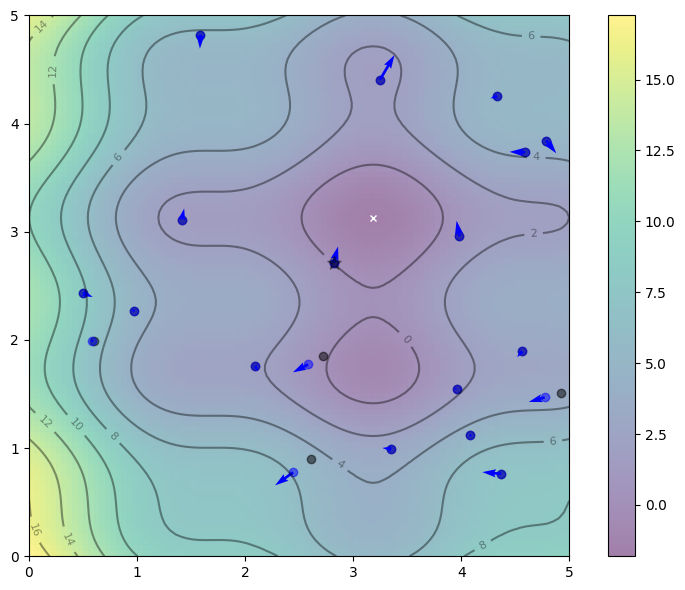

In [8]:
plotting_func(pso)

In [9]:
pso.run(max_iterations=3)

(array([2.90096146, 3.00822848]), np.float64(-1.264410394500862))

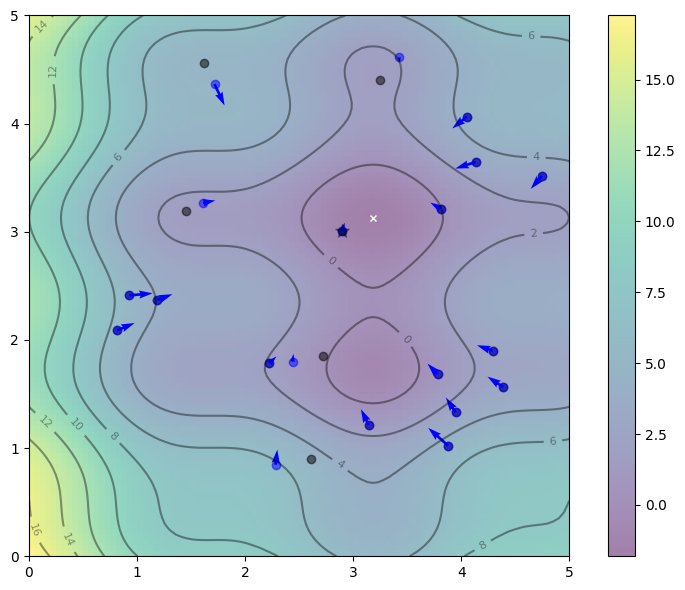

In [10]:
plotting_func(pso)

In [11]:
pso.run(max_iterations=10000)

INFO:root: Global minimum is no longer being updated.


(array([3.18452382, 3.1273052 ]), np.float64(-1.8082947928357813))

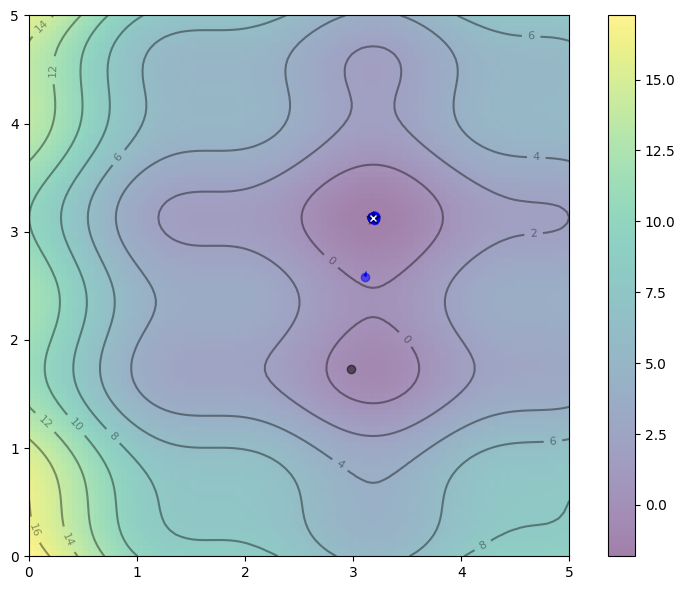

In [12]:
plotting_func(pso)

 # Summary

 As we can see the algorithm mostly converges in the given number of iterations. We can now look to apply this for feature selection and optimisation.